In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

In [43]:
df = pd.read_csv("cleaned data/價格_全國香蕉交易資料(初步清洗).csv", usecols=[0, 1, 2, 3, 4, 5, 6, 8])
df

,日期,市場,產品,上價,中價,下價,平均價(元/公斤),交易量(公斤)
0,2011-01-01,104 台北二,A1 香蕉,35.0,32.1,25.6,31.4,9645
1,2011-01-02,104 台北二,A1 香蕉,35.1,33.1,25.8,32.0,12230
2,2011-01-04,104 台北二,A1 香蕉,35.8,33.1,27.0,32.4,11976
3,2011-01-05,104 台北二,A1 香蕉,36.5,33.9,27.8,33.2,7520
4,2011-01-06,104 台北二,A1 香蕉,38.2,35.5,28.9,34.7,8160
...,...,...,...,...,...,...,...,...
31689,2021-06-08,930 台東市,A1 香蕉,28.0,18.3,12.0,20.7,3115
31690,2021-06-09,930 台東市,A1 香蕉,28.0,18.3,12.0,21.2,2885
31691,2021-06-10,930 台東市,A1 香蕉,24.0,16.8,11.0,18.7,3885
31692,2021-06-11,930 台東市,A1 香蕉,26.0,18.3,13.0,20.7,4522


In [44]:
df["日期"] = pd.to_datetime(df["日期"])

In [45]:
df.dtypes

日期           datetime64[ns]
市場                   object
產品                   object
上價                  float64
中價                  float64
下價                  float64
平均價(元/公斤)           float64
交易量(公斤)               int64
dtype: object

### 台北一市場各年度價格＆交易量

In [48]:
df_taipei = df.loc[df["市場"] == "109 台北一"]

In [49]:
df_taipei.set_index("日期", inplace=True)
df_taipei

,市場,產品,上價,中價,下價,平均價(元/公斤),交易量(公斤)
日期,,,,,,,
2011-01-01,109 台北一,A1 香蕉,33.8,26.6,20.9,26.9,15779
2011-01-02,109 台北一,A1 香蕉,36.4,28.8,22.0,28.9,17462
2011-01-04,109 台北一,A1 香蕉,37.1,30.9,23.5,30.7,19405
2011-01-05,109 台北一,A1 香蕉,36.8,31.7,23.1,31.0,22050
2011-01-06,109 台北一,A1 香蕉,35.9,30.2,24.5,30.2,15062
...,...,...,...,...,...,...,...
2021-06-10,109 台北一,A1 香蕉,34.6,25.5,17.6,25.8,18943
2021-06-11,109 台北一,A1 香蕉,35.1,25.2,14.9,25.1,18309
2021-06-12,109 台北一,A1 香蕉,34.4,25.4,15.8,25.3,15720


In [50]:
output_month = df_taipei.resample("M").mean()

In [51]:
output_month

,上價,中價,下價,平均價(元/公斤),交易量(公斤)
日期,,,,,
2011-01-31,41.500000,34.748148,26.251852,34.400000,14110.444444
2011-02-28,45.994444,38.077778,28.994444,37.855556,16074.444444
2011-03-31,45.433333,37.203704,28.192593,37.044444,17122.888889
2011-04-30,45.312000,38.184000,29.368000,37.840000,20311.640000
2011-05-31,34.330769,28.488462,21.534615,28.265385,20884.846154
...,...,...,...,...,...
2021-02-28,30.916667,25.127778,19.027778,25.061111,17532.222222
2021-03-31,29.732000,23.472000,17.736000,23.584000,19986.480000
2021-04-30,25.396000,20.164000,15.412000,20.268000,20400.080000


In [52]:
output_month["Year"] = list(output_month.reset_index()["日期"].dt.year)
output_month

,上價,中價,下價,平均價(元/公斤),交易量(公斤),Year
日期,,,,,,
2011-01-31,41.500000,34.748148,26.251852,34.400000,14110.444444,2011
2011-02-28,45.994444,38.077778,28.994444,37.855556,16074.444444,2011
2011-03-31,45.433333,37.203704,28.192593,37.044444,17122.888889,2011
2011-04-30,45.312000,38.184000,29.368000,37.840000,20311.640000,2011
2011-05-31,34.330769,28.488462,21.534615,28.265385,20884.846154,2011
...,...,...,...,...,...,...
2021-02-28,30.916667,25.127778,19.027778,25.061111,17532.222222,2021
2021-03-31,29.732000,23.472000,17.736000,23.584000,19986.480000,2021
2021-04-30,25.396000,20.164000,15.412000,20.268000,20400.080000,2021


In [53]:
x = np.arange(1, 13)
y = output_month.loc[output_month["Year"] == 2011]

In [54]:
y

,上價,中價,下價,平均價(元/公斤),交易量(公斤),Year
日期,,,,,,
2011-01-31,41.500000,34.748148,26.251852,34.400000,14110.444444,2011
2011-02-28,45.994444,38.077778,28.994444,37.855556,16074.444444,2011
2011-03-31,45.433333,37.203704,28.192593,37.044444,17122.888889,2011
2011-04-30,45.312000,38.184000,29.368000,37.840000,20311.640000,2011
2011-05-31,34.330769,28.488462,21.534615,28.265385,20884.846154,2011
2011-06-30,24.244000,18.812000,13.684000,18.876000,23463.480000,2011
2011-07-31,20.318519,16.211111,11.922222,16.177778,20468.037037,2011
2011-08-31,17.984000,12.932000,8.560000,13.064000,23111.280000,2011
2011-09-30,17.276000,12.892000,8.564000,12.904000,22789.960000,2011


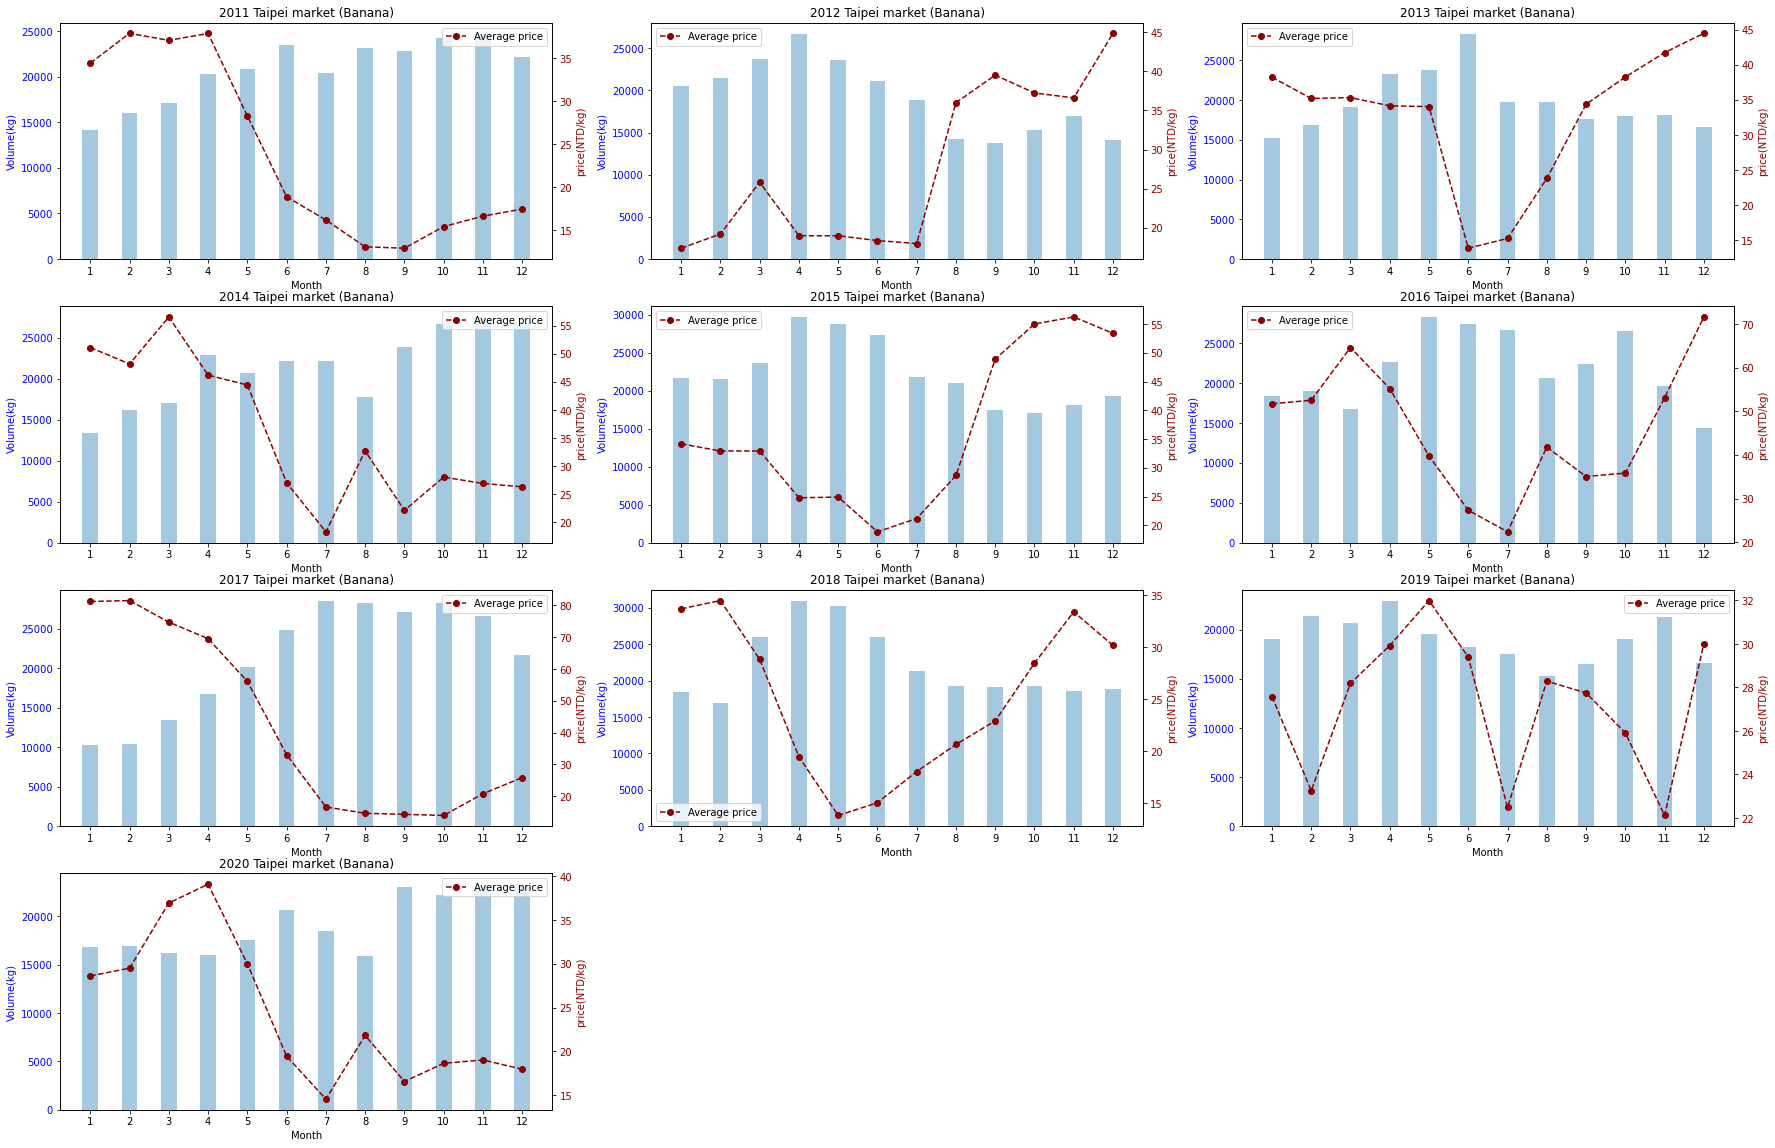

In [55]:
x = np.arange(1, 13)
num = 1

fig_test = plt.figure(figsize=(30,20))
    
for year in range(2011, 2021):
    
    y = output_month.loc[output_month["Year"] == year]
    #fig,ax1 = plt.subplots(figsize=(4,3))
    
    ax1 = fig_test.add_subplot(4,3,num)
    
    width = 0.2
    ax1.set_xticks(x)
    ax1.bar(x, y["交易量(公斤)"], width=0.4, alpha=0.4)
    ax1.set_xlabel("Month")
    ax1.set_ylabel("Volume(kg)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    ax2 = ax1.twinx()
    ax2.plot(x, y["平均價(元/公斤)"], "--", marker="o", color="darkred",label="Average price")
    ax2.set_ylabel("price(NTD/kg)", color="darkred")
    ax2.tick_params(axis="y", labelcolor="darkred")

    #fig.tight_layout()
    plt.title(f"{year} Taipei market (Banana)")
    plt.legend()
    
    num+=1

### 台中市場各年度價格＆交易量

In [56]:
df_taichung = df.loc[df["市場"] == "400 台中市"]

In [57]:
df_taichung.set_index("日期", inplace=True)
df_taichung

,市場,產品,上價,中價,下價,平均價(元/公斤),交易量(公斤)
日期,,,,,,,
2011-01-01,400 台中市,A1 香蕉,29.4,22.9,12.9,22.1,23713
2011-01-02,400 台中市,A1 香蕉,27.1,22.4,14.3,21.7,27072
2011-01-04,400 台中市,A1 香蕉,29.6,22.9,14.6,24.9,67785
2011-01-05,400 台中市,A1 香蕉,27.3,22.3,16.0,23.6,34038
2011-01-06,400 台中市,A1 香蕉,29.2,22.6,12.4,24.5,18480
...,...,...,...,...,...,...,...
2021-06-10,400 台中市,A1 香蕉,25.8,23.2,13.8,23.1,30348
2021-06-11,400 台中市,A1 香蕉,26.0,23.8,17.0,23.7,20520
2021-06-12,400 台中市,A1 香蕉,26.2,18.6,11.9,22.7,28971


In [58]:
output_month = df_taichung.resample("M").mean()

In [59]:
output_month

,上價,中價,下價,平均價(元/公斤),交易量(公斤)
日期,,,,,
2011-01-31,36.237037,29.944444,19.385185,31.074074,23668.888889
2011-02-28,44.483333,35.588889,25.083333,37.133333,29239.555556
2011-03-31,40.729630,34.062963,24.237037,35.244444,26705.888889
2011-04-30,41.608000,33.960000,23.492000,35.636000,30024.560000
2011-05-31,31.884615,24.434615,15.684615,25.746154,30929.615385
...,...,...,...,...,...
2021-02-28,27.733333,22.266667,12.900000,24.577778,32625.444444
2021-03-31,29.060000,23.160000,15.272000,25.832000,32692.600000
2021-04-30,20.808000,16.712000,10.596000,18.200000,31812.000000


In [60]:
output_month["Year"] = list(output_month.reset_index()["日期"].dt.year)
output_month

,上價,中價,下價,平均價(元/公斤),交易量(公斤),Year
日期,,,,,,
2011-01-31,36.237037,29.944444,19.385185,31.074074,23668.888889,2011
2011-02-28,44.483333,35.588889,25.083333,37.133333,29239.555556,2011
2011-03-31,40.729630,34.062963,24.237037,35.244444,26705.888889,2011
2011-04-30,41.608000,33.960000,23.492000,35.636000,30024.560000,2011
2011-05-31,31.884615,24.434615,15.684615,25.746154,30929.615385,2011
...,...,...,...,...,...,...
2021-02-28,27.733333,22.266667,12.900000,24.577778,32625.444444,2021
2021-03-31,29.060000,23.160000,15.272000,25.832000,32692.600000,2021
2021-04-30,20.808000,16.712000,10.596000,18.200000,31812.000000,2021


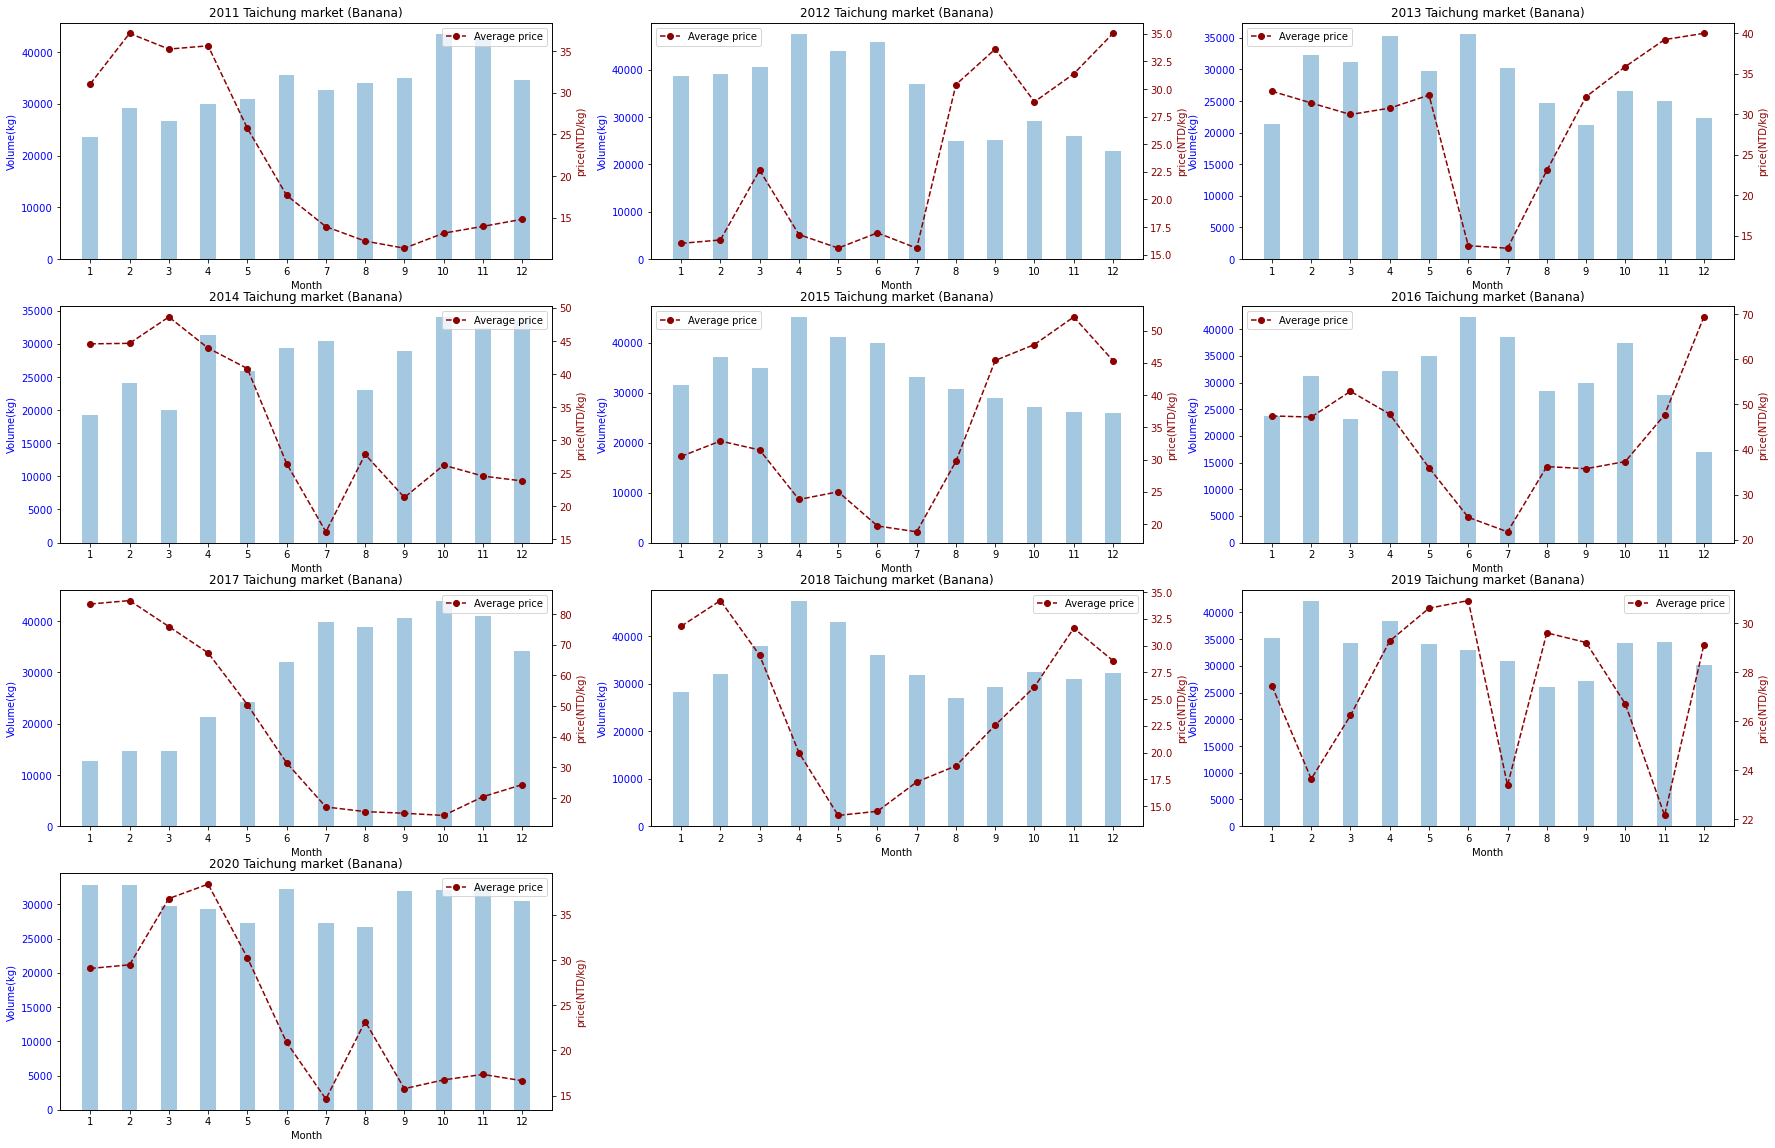

In [64]:
x = np.arange(1, 13)
num = 1

fig_test = plt.figure(figsize=(30,20))
    
for year in range(2011, 2021):
    
    y = output_month.loc[output_month["Year"] == year]
    #fig,ax1 = plt.subplots(figsize=(4,3))
    
    ax1 = fig_test.add_subplot(4,3,num)
    
    width = 0.2
    ax1.set_xticks(x)
    ax1.bar(x, y["交易量(公斤)"], width=0.4, alpha=0.4)
    ax1.set_xlabel("Month")
    ax1.set_ylabel("Volume(kg)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    ax2 = ax1.twinx()
    ax2.plot(x, y["平均價(元/公斤)"], "--", marker="o", color="darkred",label="Average price")
    ax2.set_ylabel("price(NTD/kg)", color="darkred")
    ax2.tick_params(axis="y", labelcolor="darkred")

    #fig.tight_layout()
    plt.title(f"{year} Taichung market (Banana)")
    plt.legend()
    
    num+=1

### 全國市場個年度價格＆交易量

In [29]:
df_test = pd.read_csv("cleaned data/價格_全國香蕉交易資料(初步清洗).csv", usecols=[0, 1, 2, 3, 4, 5, 6, 8])
df_test

,日期,市場,產品,上價,中價,下價,平均價(元/公斤),交易量(公斤)
0,2011-01-01,104 台北二,A1 香蕉,35.0,32.1,25.6,31.4,9645
1,2011-01-02,104 台北二,A1 香蕉,35.1,33.1,25.8,32.0,12230
2,2011-01-04,104 台北二,A1 香蕉,35.8,33.1,27.0,32.4,11976
3,2011-01-05,104 台北二,A1 香蕉,36.5,33.9,27.8,33.2,7520
4,2011-01-06,104 台北二,A1 香蕉,38.2,35.5,28.9,34.7,8160
...,...,...,...,...,...,...,...,...
31689,2021-06-08,930 台東市,A1 香蕉,28.0,18.3,12.0,20.7,3115
31690,2021-06-09,930 台東市,A1 香蕉,28.0,18.3,12.0,21.2,2885
31691,2021-06-10,930 台東市,A1 香蕉,24.0,16.8,11.0,18.7,3885
31692,2021-06-11,930 台東市,A1 香蕉,26.0,18.3,13.0,20.7,4522


In [30]:
df_test["日期"] = pd.to_datetime(df_test["日期"])
df_test

,日期,市場,產品,上價,中價,下價,平均價(元/公斤),交易量(公斤)
0,2011-01-01,104 台北二,A1 香蕉,35.0,32.1,25.6,31.4,9645
1,2011-01-02,104 台北二,A1 香蕉,35.1,33.1,25.8,32.0,12230
2,2011-01-04,104 台北二,A1 香蕉,35.8,33.1,27.0,32.4,11976
3,2011-01-05,104 台北二,A1 香蕉,36.5,33.9,27.8,33.2,7520
4,2011-01-06,104 台北二,A1 香蕉,38.2,35.5,28.9,34.7,8160
...,...,...,...,...,...,...,...,...
31689,2021-06-08,930 台東市,A1 香蕉,28.0,18.3,12.0,20.7,3115
31690,2021-06-09,930 台東市,A1 香蕉,28.0,18.3,12.0,21.2,2885
31691,2021-06-10,930 台東市,A1 香蕉,24.0,16.8,11.0,18.7,3885
31692,2021-06-11,930 台東市,A1 香蕉,26.0,18.3,13.0,20.7,4522


In [31]:
df_test.set_index("日期", inplace=True)
df_test

,市場,產品,上價,中價,下價,平均價(元/公斤),交易量(公斤)
日期,,,,,,,
2011-01-01,104 台北二,A1 香蕉,35.0,32.1,25.6,31.4,9645
2011-01-02,104 台北二,A1 香蕉,35.1,33.1,25.8,32.0,12230
2011-01-04,104 台北二,A1 香蕉,35.8,33.1,27.0,32.4,11976
2011-01-05,104 台北二,A1 香蕉,36.5,33.9,27.8,33.2,7520
2011-01-06,104 台北二,A1 香蕉,38.2,35.5,28.9,34.7,8160
...,...,...,...,...,...,...,...
2021-06-08,930 台東市,A1 香蕉,28.0,18.3,12.0,20.7,3115
2021-06-09,930 台東市,A1 香蕉,28.0,18.3,12.0,21.2,2885
2021-06-10,930 台東市,A1 香蕉,24.0,16.8,11.0,18.7,3885


In [32]:
output = df_test.resample("M").mean()

In [35]:
# 參考
output["Year"] = list(output.reset_index()["日期"].dt.year)
output

,上價,中價,下價,平均價(元/公斤),交易量(公斤),Year
日期,,,,,,
2011-01-31,38.221461,31.468950,22.722831,31.627397,8864.607306,2011
2011-02-28,43.536735,36.085034,26.272789,36.231973,9965.448980,2011
2011-03-31,42.141014,34.878802,26.184332,35.166359,10240.317972,2011
2011-04-30,45.061000,37.634000,28.939500,37.940500,11693.000000,2011
2011-05-31,35.646226,29.544340,22.216509,29.606604,12066.372642,2011
...,...,...,...,...,...,...
2021-02-28,29.966010,23.112808,16.772906,23.283251,10912.280788,2021
2021-03-31,30.210638,23.237234,17.064184,23.313830,11220.067376,2021
2021-04-30,25.038408,18.867820,13.528720,18.920415,11619.217993,2021


In [ ]:
output["year"] = list(output.reset_index()["日期"].dt.year)

In [37]:
output[output["Year"] == 2011]

,上價,中價,下價,平均價(元/公斤),交易量(公斤),Year
日期,,,,,,
2011-01-31,38.221461,31.468950,22.722831,31.627397,8864.607306,2011
2011-02-28,43.536735,36.085034,26.272789,36.231973,9965.448980,2011
2011-03-31,42.141014,34.878802,26.184332,35.166359,10240.317972,2011
2011-04-30,45.061000,37.634000,28.939500,37.940500,11693.000000,2011
2011-05-31,35.646226,29.544340,22.216509,29.606604,12066.372642,2011
2011-06-30,26.565025,20.878325,14.754187,21.083251,13940.133005,2011
2011-07-31,20.636866,16.273733,11.648848,16.348387,13111.129032,2011
2011-08-31,20.780693,15.596040,10.013366,15.698515,14477.787129,2011
2011-09-30,18.810345,14.156650,9.303448,14.225616,14288.423645,2011


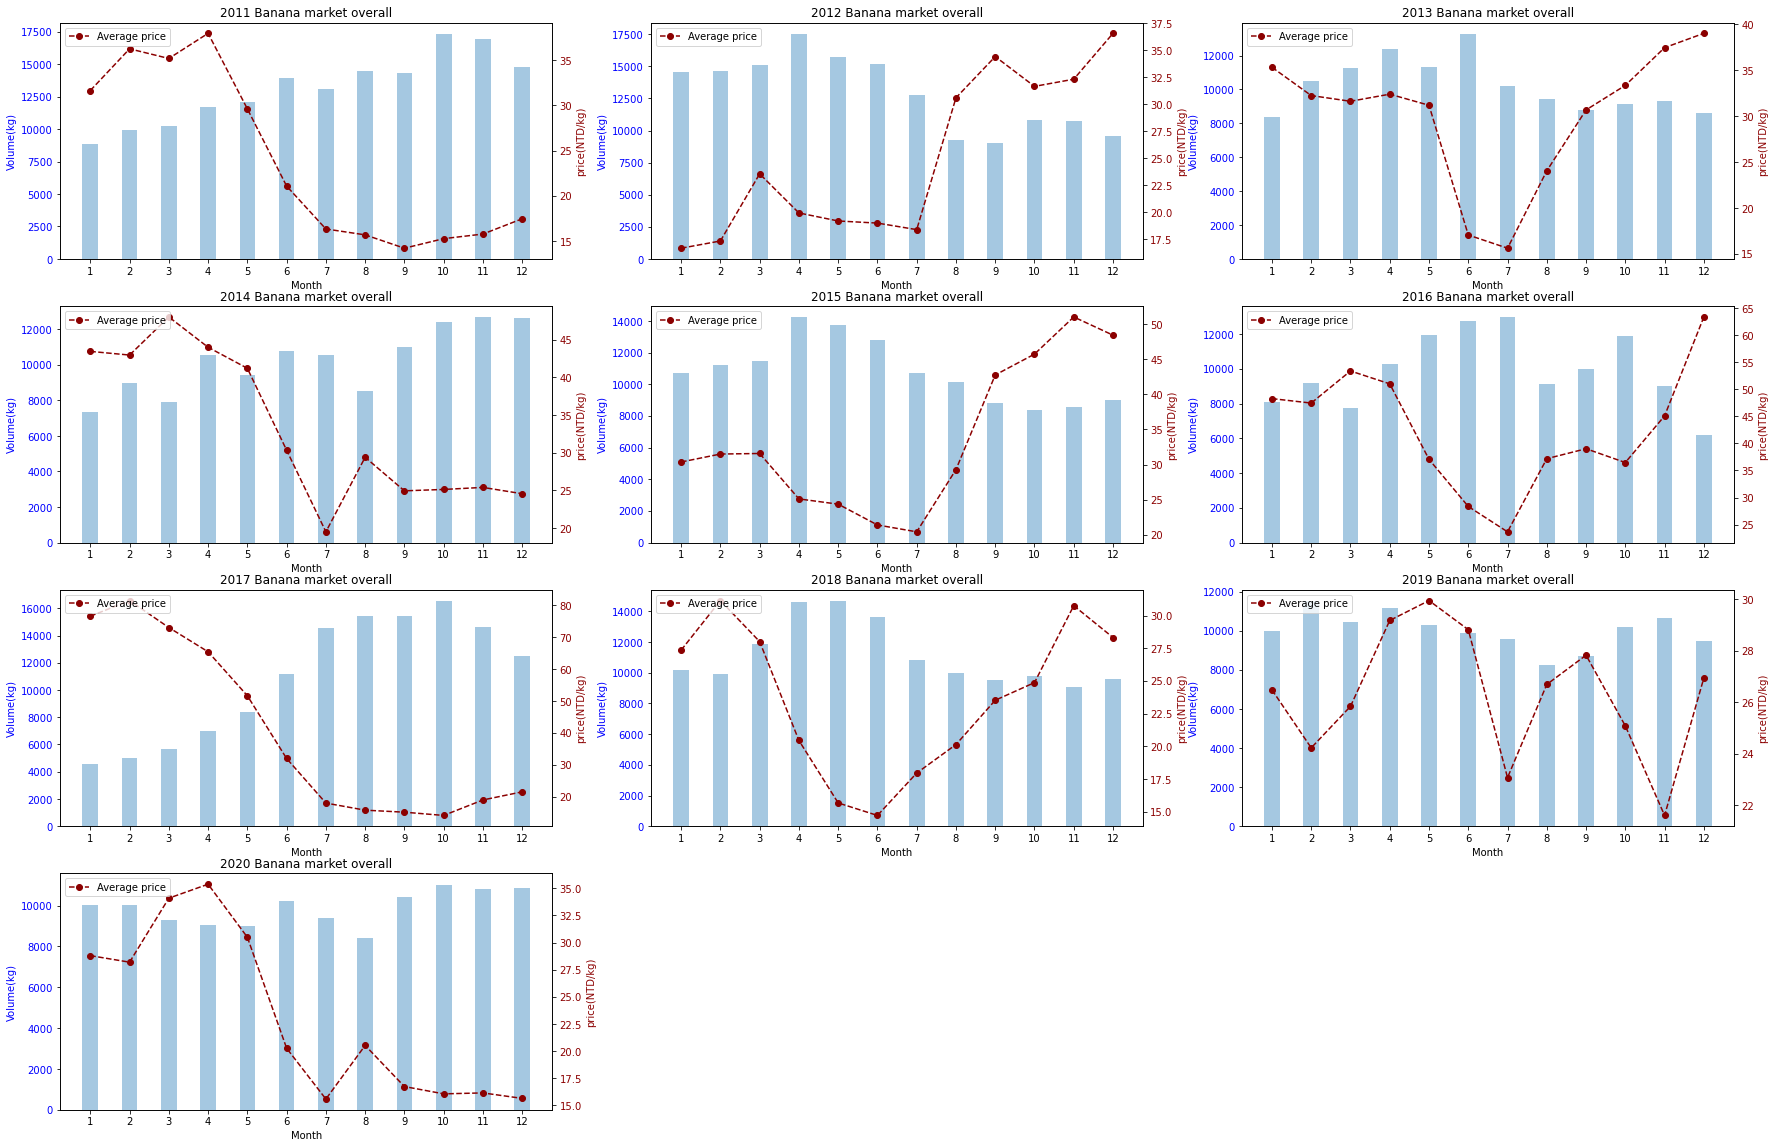

In [65]:
x = np.arange(1, 13)
num = 1

fig_test = plt.figure(figsize=(30,20))
    
for year in range(2011, 2021):
    
    y = output.loc[output["Year"] == year]
    ax1 = fig_test.add_subplot(4,3,num)
    
    width = 0.2
    ax1.set_xticks(x)
    ax1.bar(x, y["交易量(公斤)"], width=0.4, alpha=0.4)
    ax1.set_xlabel("Month")
    ax1.set_ylabel("Volume(kg)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    ax2 = ax1.twinx()
    ax2.plot(x, y["平均價(元/公斤)"], "--", marker="o", color="darkred",label="Average price")
    ax2.set_ylabel("price(NTD/kg)", color="darkred")
    ax2.tick_params(axis="y", labelcolor="darkred")

    #fig.tight_layout()
    plt.title(f"{year} Banana market overall")
    plt.legend(loc="upper left")
    
    num+=1
    
    plt.savefig("全國香蕉各年度價格＆交易量.jpg")